# <font color=blue> Crude Oil Price Prediction Preliminary Model</font>
<div style="display:inline-block;vertical-align:top;">
    <img src="http://cdn.oilprice.com/a/img/content/article/718x300/b0b375f9e081b278113b145607df5fa7.jpg" alt="img"/>
</div>
<div style="display:inline-block;">
    <div><b>Author: LIANG KUANG</b></div>
    <div><b>email: KUANGLIANGJ@GMAIL.COM</b></div>
    <div><b>Phone: +1(201)5391679</b></div>
</div>

<div>
This is a simple model for predicting oil price using historical oil price from http://www.investing.com/commodities/crude-oil-historical-data. 

Two models were constructed: Linear and Supporter Vector Machine using RBF kernel. 
Data used in this case is daily oil open price from 2014-01-01 to 2016-12-27. As show from the analysi,linear model definitely won't be enough to capture the non-linearilty of the crude oil trend. SVM with RBF kernel does a great job.

</div>
As seen from the preliminary results, the oil price will rebound at the first quarter of 2017 and settle down to flat. 
The 7 day, 30 days and 365 day oil price based on pure historical price from SVM regression model will be:

* (' - 7 day : ', \$53.99)
* (' - 30 days : ', \$59.29)
* (' - 365 days : ', \$62.88)



In [1]:
# import libraries
import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
pd.set_option('display.max_columns', 15)
pd.set_option('display.max_rows',10)
pd.options.display.float_format = '{:12,.6f}'.format
%matplotlib inline
matplotlib.style.use('ggplot')

In [2]:
# read in source data
inputfile = r'R:\work\python\oil_price\oil_price.csv'
historical_oilprice = pd.read_csv(inputfile,sep=',',parse_dates=True) 
days_to_predict = 365

In [3]:
def date_time_parser(s):
    try:
        return pd.datetime.strptime(s,'%m/%d/%y')
    except TypeError:
        return pd.NaT
    
historical_oilprice['Date'] = historical_oilprice['Date'] .apply(date_time_parser)
date = historical_oilprice['Date']
type(date)

pandas.core.series.Series

In [4]:
historical_oilprice['Price'] = historical_oilprice['Price'] * 100
historical_oilprice['Vol'] = historical_oilprice['Vol'].replace('-',np.NAN)
historical_oilprice['Day'] = historical_oilprice['Date'].apply(lambda x: (x-historical_oilprice['Date'][0]).days) 
historical_oilprice.set_index(['Date'],inplace=True)
print(historical_oilprice.shape)

(788, 8)


In [5]:
historical_oilprice.head() 

,ID,Price,Open,High,Low,Vol,Change,Day
Date,,,,,,,,
2014-01-01,1,"9,870.000000",98.610000,98.760000,98.540000,NaN,0.28%,0
2014-01-02,2,"9,544.000000",98.500000,98.970000,95.340000,251.25K,-3.30%,1
2014-01-03,3,"9,396.000000",95.470000,95.740000,93.860000,215.52K,-1.55%,2
2014-01-06,4,"9,343.000000",94.180000,94.590000,93.200000,189.38K,-0.56%,5
2014-01-07,5,"9,367.000000",93.600000,94.220000,93.350000,177.18K,0.26%,6


In [6]:
#Check missing data
def check_missing(data):
    df_sum =pd.DataFrame(data.isnull().sum()).T
    df_any =pd.DataFrame(data.isnull().any()).T 

    missing_stats_df = df_any.append(df_sum)
    missing_stats_df.index = ['Empty Exist','Count']

    for column in missing_stats_df.columns:
        if missing_stats_df[column][0] == True :
            print("There are missing value in column '%s': missing %d record "%(column,missing_stats_df.loc['Count',column]))
        else:
            print("There is no missing data in column '%s'"% column)
    return missing_stats_df


In [7]:
missing_stats_df= check_missing(historical_oilprice)

There is no missing data in column 'ID'
There is no missing data in column 'Price'
There is no missing data in column 'Open'
There is no missing data in column 'High'
There is no missing data in column 'Low'
There are missing value in column 'Vol': missing 34 record 
There is no missing data in column 'Change'
There is no missing data in column 'Day'


In [8]:
feature = historical_oilprice['Day']
target = historical_oilprice['Price']
print(feature.shape,target.shape)

((788L,), (788L,))


In [9]:
#create model
linear = LinearRegression().fit(feature.reshape(-1,1),target.reshape(-1,1))
svr_rbf = SVR(kernel = 'rbf',C=1e3, gamma = 0.0001).fit(feature.reshape(-1,1),target.reshape(-1,1))

C:\Anaconda2\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
#extend a number of days for forecasting the future oil price
last_day = len(feature)
feature = np.append(feature,historical_oilprice['Day'][-1]*np.ones(days_to_predict)+range(1,days_to_predict+1))
target = np.append(target,np.nan*np.ones(days_to_predict))

In [11]:
# Convert back to float, so, divide every element by 100
linear_pred = list(map(lambda x: float(x) / 100, linear.predict(feature.reshape(-1,1))))
svr_rbf_pred = list(map(lambda x: float(x) / 100, svr_rbf.predict(feature.reshape(-1,1))))
target = list(map(lambda x: float(x) / 100, target))

In [12]:
# Display the prediction at 1 day, 30 days, and 365 days after the last available data
print('==== Linear regression prediction ====')
print(' - 7 day : ', linear_pred[last_day+7])
print(' - 30 days : ', linear_pred[last_day + 29])
print(' - 365 days : ', linear_pred[last_day + 364])

==== Linear regression prediction ====
(' - 7 day : ', 26.86945525451358)
(' - 30 days : ', 25.490447506304555)
(' - 365 days : ', 4.491920431303497)


In [13]:
print('==== Support vector regression  prediction ====')
print(' - 7 day : ', svr_rbf_pred[last_day+7])
print(' - 30 days : ', svr_rbf_pred[last_day + 29])
print(' - 365 days : ', svr_rbf_pred[last_day + 364])


==== Support vector regression  prediction ====
(' - 7 day : ', 55.20022589677708)
(' - 30 days : ', 59.29472945087144)
(' - 365 days : ', 62.87974697046019)


In [14]:
dayscount = np.append(historical_oilprice['Day'].tolist() ,
                      np.ones(days_to_predict)*historical_oilprice['Day'][-1]+range(1,days_to_predict+1))
full_date = [date[0] + datetime.timedelta(days = int(i)) for i in dayscount]

In [15]:
full_date[0:2]

[Timestamp('2014-01-01 00:00:00'), Timestamp('2014-01-02 00:00:00')]

In [16]:
print(len(target),len(linear_pred),len(full_date))

(1153, 1153, 1153)


In [17]:
output = np.column_stack((target,linear_pred,svr_rbf_pred))
output_df = pd.DataFrame(data = output, index = full_date,
                         columns=['historical price($)','linear_prediction($)','SVR prediction($)'])
                         

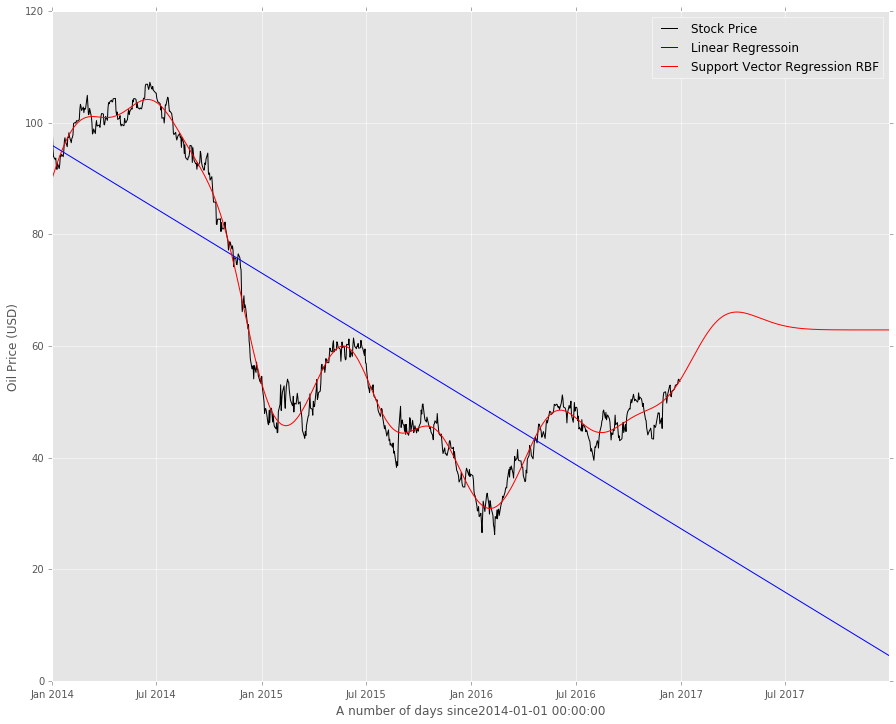

In [18]:
# plot the results
fig,ax= plt.subplots(nrows=1,ncols=1,figsize=(15,12),dpi=300)
plt.hold('on')
plt.plot(output_df.index, output_df['historical price($)'], color='black', label='Stock Price')
plt.plot(output_df.index, output_df['linear_prediction($)'], color='blue', label='Linear Regressoin')
plt.plot(output_df.index, output_df['SVR prediction($)'], color='red', label='Support Vector Regression RBF')
plt.xlabel('A number of days since' + str(historical_oilprice.index[0]))
plt.ylabel('Oil Price (USD)')

plt.legend()
plt.show()